In [3]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import utils
import gpfunctions as gp
import lstm_model
import benchmarkfunctions as bm
import skopt


In [4]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [5]:
LOSS_FUNCS = ['MIN']
BASELINES = ['SKOPT', 'RANDOM']
DIMS = [2,3,4,6]
N_STEPS = 20

In [6]:
FUNCTIONS = {
    'name': {
        2: 'Parabola-Sin',
        3: 'Hartmann3',
        4: 'Styblinski–Tang',
        6: 'Hartmann6'
    }
}

In [12]:
def load_data(dim, optimizer):
    y = np.load('../results/benchmark-functions/%dd-%s.npy' % (dim, optimizer) )
    
    return y

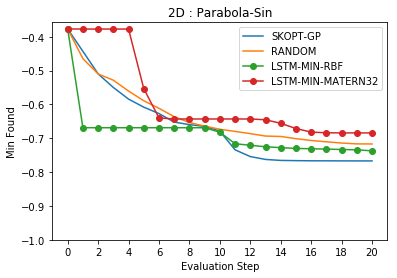

In [14]:
def plot_for_dim(dim, legend=False):
    data = {}
    
    data['SKOPT'],  data['SKOPT_STD']  = utils.average_min_found_values_across_rows(load_data(dim, 'skopt-gp'))
    
    data['RANDOM'], data['RANDOM_STD'] = utils.average_min_found_values_across_rows(load_data(dim, 'random'))
    
    x_range = range(0,len(data['SKOPT']))
    for k in BASELINES:
        label = k
        if k is 'SKOPT':
            label = 'SKOPT-GP'

        plt.plot(x_range, data[k],  label=label)
        
    for kernel in ['rbf', 'matern32']:
        for loss in ['MIN']:
            y, std_y = utils.average_min_found_values_across_rows(load_data(dim, 'lstm-%s-%s' %(loss, kernel)))

            plt.plot(x_range, y, label='LSTM-%s-%s'%(loss, kernel.upper()), marker='o')
    if legend:
        plt.legend()
    xticks = range(0,N_STEPS+1,2)
    plt.ylabel('Min Found')
    plt.xlabel('Evaluation Step')
    plt.xticks(xticks)
    plt.ylim(-1)
    plt.title('%dD : %s' % (dim, FUNCTIONS['name'][dim]) )
    plt.plot()
plot_for_dim(2, legend=True)

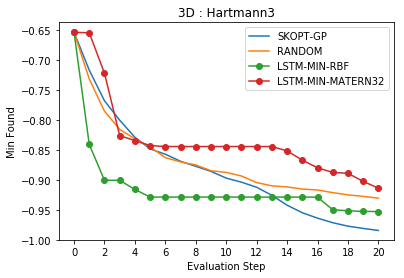

In [15]:
plot_for_dim(3, legend=True)

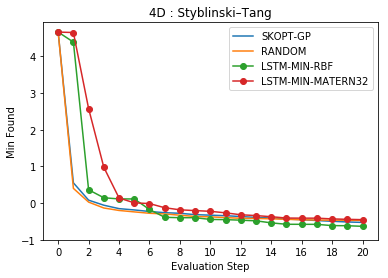

In [16]:
plot_for_dim(4, legend=True)

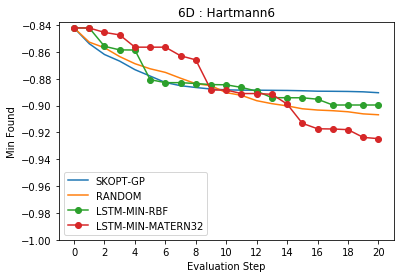

In [17]:
plot_for_dim(6, legend=True)

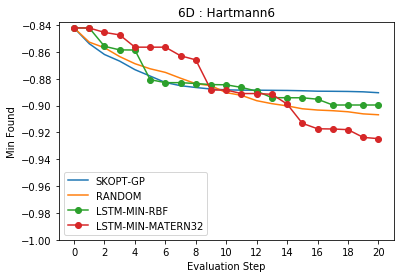

In [18]:
plot_for_dim(6, legend=True)

Average over 10 functions
- 5 permutation of x
- 2 different translations of x


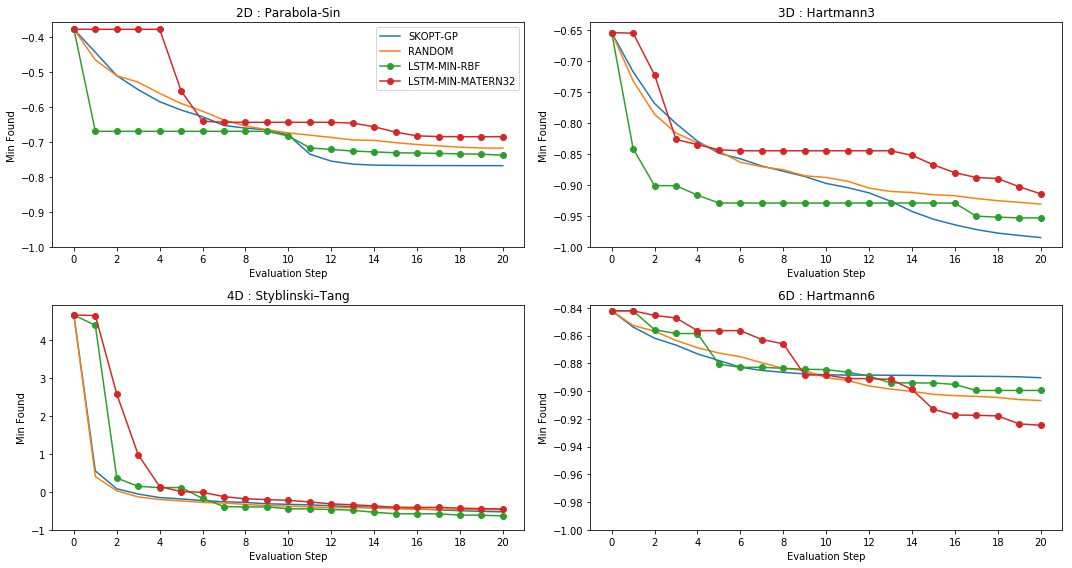

In [19]:
count = 0
plt.figure(figsize=(15,4*2))
for d in [2,3,4,6]:
    plt.subplot(2,2,count + 1 )

    plot_for_dim(d)
    if d is 2:
        plt.legend()
    count = count + 1
plt.tight_layout()
print('Average over 10 functions')
print('- 5 permutation of x')
print('- 2 different translations of x')